In [30]:
leads = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/all_leads_5pct_FDR_Storey.csv")
head(leads,2)

X,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,...,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id,BH_fdr,q_value,label
2,11_107726716_A_C,4.544994e-05,0.09036565,0.02216001,0.0001665921,11,107661717,107799019,173,...,11,107726716,C,1,0.4306358,0.5386349,ENSG00000110660,0.001808781,0.00075681,FPP_D11
7,11_106001229_C_A,5.034677e-05,-0.24701335,0.06093060,0.0258019418,11,105946228,105969437,173,...,11,106001229,A,1,0.1213873,0.4744572,ENSG00000149313,0.116865230,0.04889743,FPP_D11


In [31]:
nrow(leads)
leads$eqtl = paste0(leads$snp_id,"-",leads$feature_id)
length(unique(leads$eqtl))

[1] 15493

[1] 11199

In [34]:
head(leads,2)

X,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,...,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id,BH_fdr,q_value,label,eqtl
2,11_107726716_A_C,4.544994e-05,0.09036565,0.02216001,0.0001665921,11,107661717,107799019,173,...,107726716,C,1,0.4306358,0.5386349,ENSG00000110660,0.001808781,0.00075681,FPP_D11,11_107726716_A_C-ENSG00000110660
7,11_106001229_C_A,5.034677e-05,-0.24701335,0.06093060,0.0258019418,11,105946228,105969437,173,...,106001229,A,1,0.1213873,0.4744572,ENSG00000149313,0.116865230,0.04889743,FPP_D11,11_106001229_C_A-ENSG00000149313


In [35]:
leads$eqtl = paste0(leads$snp_id,"-",leads$feature_id)

In [36]:
# leads

In [37]:
# FPP & P_FPP
D11 = leads[leads$label == "FPP_D11",]
D30 = leads[leads$label == "FPP_D30",]
P_FPP = leads[leads$label == "P_FPP_D11",]

egenes0 = unique(D11$feature_id)
egenes1 = unique(D30$feature_id)
egenes2 = unique(P_FPP$feature_id)
##
D11 = c(length(egenes0),length(unique(c(egenes0,egenes1))),length(egenes2))
# D11 = c(length(egenes0),length(egenes2))

In [38]:
D11

[1] 2560 2784 2457

In [39]:
# DA
D30 = leads[leads$label == "DA_D30",]
D52 = leads[leads$label == "DA_D52",]
D52_r = leads[leads$label == "DA_ROT_D52",]
egenes30 = unique(D30$feature_id)
egenes = unique(D52$feature_id)
egenesROT = unique(D52_r$feature_id)
##
DA = c(length(egenes30),length(unique(c(egenes30,egenes))),length(unique(c(egenes30,egenes,egenesROT))))

In [40]:
DA

[1]  872 1313 1313

In [41]:
# Sert
D30 = leads[leads$label == "Sert_D30",]
D52 = leads[leads$label == "Sert_D52",]
D52_r = leads[leads$label == "Sert_ROT_D52",]
egenes30 = unique(D30$feature_id)
egenes = unique(D52$feature_id)
egenesROT = unique(D52_r$feature_id)
##
Sert = c(length(egenes30),length(unique(c(egenes30,egenes))),length(unique(c(egenes30,egenes,egenesROT))))

In [42]:
Sert

[1]  776 1617 1617

In [43]:
# Epen1
D30 = leads[leads$label == "Epen1_D30",]
D52 = leads[leads$label == "Epen1_D52",]
D52_r = leads[leads$label == "Epen1_D52_ROT",]
egenes30 = unique(D30$feature_id)
egenes = unique(D52$feature_id)
egenesROT = unique(D52_r$feature_id)
##
Epen1 = c(length(egenes30),length(unique(c(egenes30,egenes))),length(unique(c(egenes30,egenes,egenesROT))))

In [44]:
Epen1

[1] 1011 1664 1917

In [45]:
# Astro
D52 = leads[leads$label == "Astro_D52",]
D52_r = leads[leads$label == "Astro_ROT_D52",]
egenes = unique(D52$feature_id)
egenesROT = unique(D52_r$feature_id)
##
Astro = c(length(egenes),length(unique(c(egenes,egenesROT))))

In [46]:
Astro

[1] 257 257

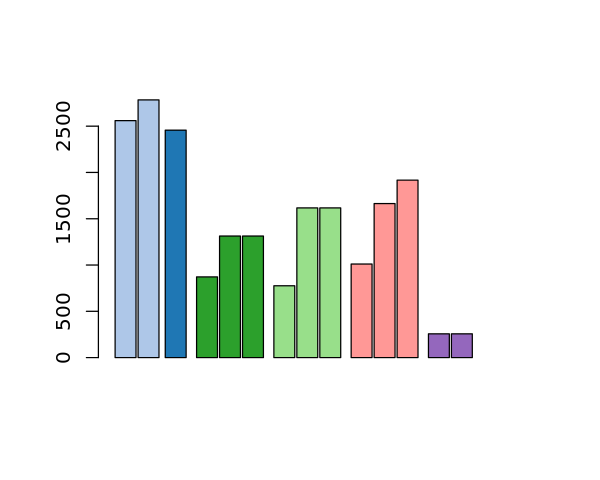

In [47]:
col_FPP = "#aec7e8"
col_P_FPP = "#1f77b4"
col_DA = "#2ca02c"
col_Sert = "#98df8a"
col_Epen1 = "#ff9896"
col_Astro = "#9467bd"

options(repr.plot.width = 5, repr.plot.height = 4)
my.xlim = c(0, 2800)
my.ylim = c(0,20)
my.space = c(0,0.1,0.3,0.5, 0.1, 0.1, 0.5, 0.1, 0.1, 0.5,0.1, 0.1,0.5,0.1)
opar <- par(lwd = 1)

barplot(c(D11,DA,Sert,Epen1,Astro),xlim = my.ylim, ylim = my.xlim, space = my.space,
       col = c(col_FPP,   col_FPP, col_P_FPP,
               col_DA,    col_DA,    col_DA, 
               col_Sert,  col_Sert,  col_Sert, 
               col_Epen1, col_Epen1, col_Epen1, 
               col_Astro, col_Astro))#,
#        border = c("lightgrey","darkgray","black", 
#                   "lightgrey","darkgray","black",  
#                   "lightgrey","darkgray","black", 
#                   "lightgrey","darkgray","black"))

In [48]:
fig_dir = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/figures/main_figures/"
pdf(paste0(fig_dir,"Figure4a.pdf"), width=5, height=4)
barplot(c(D11,DA,Sert,Epen1,Astro),xlim = my.ylim, ylim = my.xlim, space = my.space,
       col = c(col_FPP,   col_FPP, col_P_FPP,
               col_DA,    col_DA,    col_DA, 
               col_Sert,  col_Sert,  col_Sert, 
               col_Epen1, col_Epen1, col_Epen1, 
               col_Astro, col_Astro))
dev.off()

png 
  2